## Targetweight = sum of all cweights


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import copy
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import random

###############
# User inputs #
###############

### Lists of NFTs in each category ###
expert_token_Ids = [f"tokenId {num}" for num in [11, 15, 17, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45]]
graduates_tokenIds = [f"tokenId {num}" for num in  [1,2,3,4,5,6,7,8,9,10]]
student_tokenIds = [f"tokenId {num}" for num in [12, 13, 14, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,]]

### Intial NFT supply ###
# Import NFT supply information
file_name = "/content/drive/MyDrive/Colab Notebooks/data/2024-06-19_anon_nft_balances.csv"
user_data = pd.read_csv(file_name)

# Initialize the supply dictionary
# TODO: Make generic
initial_nft_supply = {
    'expert': {},
    'graduate': {},
    'student': {}
}

# Calculate sum for each token column
## TODO: Remove ID column
token_sums = user_data.sum()

# Sort tokens into categories based on predefined lists
for token_id in expert_token_Ids:
    if token_id in token_sums.index:
        initial_nft_supply['expert'][token_id] = int(token_sums[token_id])

for token_id in graduates_tokenIds:
    if token_id in token_sums.index:
        initial_nft_supply['graduate'][token_id] = int(token_sums[token_id])

for token_id in student_tokenIds:
    if token_id in token_sums.index:
        initial_nft_supply['student'][token_id] = int(token_sums[token_id])


### Initial token scores ###
## TODO: Can be updated to read scores from csv
default_nft_scores = {
    "tokenId 1": 1,
    "tokenId 2": 1,
    "tokenId 3": 1,
    "tokenId 4": 1,
    "tokenId 5": 1,
    "tokenId 6": 1,
    "tokenId 7": 1,
    "tokenId 8": 1,
    "tokenId 9": 1,
    "tokenId 10": 1,
    "tokenId 11": 1,
    "tokenId 12": 1,
    "tokenId 13": 1,
    "tokenId 14": 1,
    "tokenId 15": 1,
    "tokenId 16": 1,
    "tokenId 17": 1,
    "tokenId 18": 1,
    "tokenId 19": 1,
    "tokenId 20": 1,
    "tokenId 21": 1,
    "tokenId 22": 1,
    "tokenId 23": 1,
    "tokenId 24": 1,
    "tokenId 25": 1,
    "tokenId 26": 1,
    "tokenId 27": 1,
    "tokenId 28": 1,
    "tokenId 29": 1,
    "tokenId 30": 1,
    "tokenId 31": 1,
    "tokenId 32": 1,
    "tokenId 33": 1,
    "tokenId 34": 1,
    "tokenId 35": 1,
    "tokenId 36": 1,
    "tokenId 37": 1,
    "tokenId 38": 1,
    "tokenId 39": 1,
    "tokenId 40": 1,
    "tokenId 41": 1,
    "tokenId 42": 1,
    "tokenId 43": 1,
    "tokenId 44": 1,
    "tokenId 45": 1
}

# Initialize the nft score dictionary
# TODO: Make generic
nft_scores = {
    'expert': {},
    'graduate': {},
    'student': {}
}

# Sort token scores into categories based on predefined lists
for token_id in expert_token_Ids:
    if token_id in token_sums.index:
        nft_scores['expert'][token_id] = int(default_nft_scores[token_id])

for token_id in graduates_tokenIds:
    if token_id in token_sums.index:
        nft_scores['graduate'][token_id] = int(default_nft_scores[token_id])

for token_id in student_tokenIds:
    if token_id in token_sums.index:
        nft_scores['student'][token_id] = int(default_nft_scores[token_id])

#print(expert_token_Ids)
#print(graduates_tokenIds)
#print(student_tokenIds)
print('Initial Supply: ')
print(initial_nft_supply)
print('Initial Scores: ')
print(nft_scores)

### No. of loops to run ###
iterations = 101
### Amount to increment by each loop ###
# TODO: Make range for rand()
increment = 1
rand_range = list(range(10))

### Colours ###
colors = {'expert': 'blue', 'graduate': 'green', 'student': 'red'}

##################################
## Store the evolution of values #
##################################

# Copy of nft_supply for use in calculations
nft_supply = copy.deepcopy(initial_nft_supply)

# Initialize lists to store simulation results
target_weights = []
total_amounts = defaultdict(list)
category_weights = defaultdict(list)
multipliers = defaultdict(list)

# Initialize nested defaultdicts for NFT tracking
nft_supplies = defaultdict(lambda: defaultdict(list))
nft_weights = defaultdict(lambda: defaultdict(list))
nft_weight_increases = defaultdict(lambda: defaultdict(list))

################
## Simulation ##
################

# Simulation over iterations
for i in range(iterations):
    # Increase the number of NFTs and store the sum
    # Test if first round, if so don't increment
    if i != 0:
        # Randomly select a category (outer key)
        rand_category = random.choice(list(nft_supply.keys()))
         # Randomly select an NFT type (inner key) from the chosen category
        rand_nft_type = random.choice(list(nft_supply[rand_category].keys()))
        # Increment the selected NFT value rand_range
        nft_supply[rand_category][rand_nft_type] += increment
        print(rand_category)
        print(rand_nft_type)
        # Uncomment for random addition
        # nft_supply[rand_category][rand_nft_type] += random.choice(rand_range)
    # Store updated supply
    for category in nft_supply:
        for nft_type in nft_supply[category]:
            nft_supplies[category][nft_type].append(nft_supply[category][nft_type])

    # Calculate and store category weights
    category_weight = {}
    for category in nft_supply:
        total = 0
        for nft_type in nft_supply[category]:
            total += nft_supply[category][nft_type] * nft_scores[category][nft_type]
        category_weight[category] = total
        # Store weight
        category_weights[category].append(total)

    # Calculate and store target weight
    target_weight = category_weight['expert'] + category_weight['graduate'] + category_weight['student']
    target_weights.append(target_weight)

    # Calculate and store total amounts per category
    for category in nft_supply:
        total = sum(nft_supply[category].values())
        total_amounts[category].append(total)

    # Calculate multipliers and new NFT weights
    for category in nft_supply:
        if category_weight[category] != 0:
            multiplier = target_weight / category_weight[category]
        else:
            multiplier = target_weight # changed float('inf') to = target_weight for clarity
        multipliers[category].append(multiplier)

        # Update NFT weights based on multiplier
        for nft_type in nft_scores[category]:
            new_weight = nft_scores[category][nft_type] * multiplier
            nft_weights[category][nft_type].append(new_weight)

            if i != 0:
              diff = new_weight - nft_weights[category][nft_type][-1]
              nft_weight_increases[category][nft_type].append(diff)


Initial Supply: 
{'expert': {'tokenId 11': 4, 'tokenId 15': 7, 'tokenId 17': 12, 'tokenId 31': 0, 'tokenId 32': 1, 'tokenId 33': 1, 'tokenId 34': 2, 'tokenId 35': 1, 'tokenId 36': 1, 'tokenId 37': 0, 'tokenId 38': 1, 'tokenId 39': 5, 'tokenId 40': 3, 'tokenId 41': 0, 'tokenId 42': 7, 'tokenId 43': 0, 'tokenId 45': 0}, 'graduate': {'tokenId 1': 243, 'tokenId 2': 114, 'tokenId 3': 188, 'tokenId 4': 90, 'tokenId 5': 136, 'tokenId 6': 56, 'tokenId 7': 105, 'tokenId 8': 38, 'tokenId 9': 98, 'tokenId 10': 49}, 'student': {'tokenId 12': 0, 'tokenId 13': 21, 'tokenId 14': 1, 'tokenId 16': 33, 'tokenId 18': 23, 'tokenId 19': 11, 'tokenId 20': 57, 'tokenId 21': 21, 'tokenId 22': 146, 'tokenId 23': 13, 'tokenId 24': 0, 'tokenId 25': 4, 'tokenId 26': 6, 'tokenId 27': 7, 'tokenId 28': 18, 'tokenId 29': 8}}
Initial Scores: 
{'expert': {'tokenId 11': 1, 'tokenId 15': 1, 'tokenId 17': 1, 'tokenId 31': 1, 'tokenId 32': 1, 'tokenId 33': 1, 'tokenId 34': 1, 'tokenId 35': 1, 'tokenId 36': 1, 'tokenId 37':

## Results Verification

In [6]:
##################
## Verification ##
##################

for i in [0, iterations // 2, iterations - 1]:
    print(f"\nIteration {i}:")
    print("Target Weight:", target_weights[i])

    print("Total Supplies:")
    for category in total_amounts:
        print(f"  {category}: {total_amounts[category][i]}")
    print("Category Weights:")
    for category in category_weights:
        print(f"  {category}: {category_weights[category][i]}")
    print("Multipliers:")
    for category in multipliers:
        print(f"  {category}: {multipliers[category][i]}")

    for category in multipliers:
        if(category_weights[category][i] * multipliers[category][i] == target_weights[i]):
            print(f"SUCESSS - {category}")
        else:
            print(f"FAILURE - {category}")

        print(f"{category_weights[category][i]} * {multipliers[category][i]} = {target_weights[i]}")



Iteration 0:
Target Weight: 1531
Total Supplies:
  expert: 45
  graduate: 1117
  student: 369
Category Weights:
  expert: 45
  graduate: 1117
  student: 369
Multipliers:
  expert: 34.022222222222226
  graduate: 1.370635631154879
  student: 4.149051490514905
FAILURE - expert
45 * 34.022222222222226 = 1531
SUCESSS - graduate
1117 * 1.370635631154879 = 1531
SUCESSS - student
369 * 4.149051490514905 = 1531

Iteration 50:
Target Weight: 1581
Total Supplies:
  expert: 56
  graduate: 1137
  student: 388
Category Weights:
  expert: 56
  graduate: 1137
  student: 388
Multipliers:
  expert: 28.232142857142858
  graduate: 1.3905013192612137
  student: 4.074742268041237
SUCESSS - expert
56 * 28.232142857142858 = 1581
SUCESSS - graduate
1137 * 1.3905013192612137 = 1581
SUCESSS - student
388 * 4.074742268041237 = 1581

Iteration 100:
Target Weight: 1631
Total Supplies:
  expert: 73
  graduate: 1155
  student: 403
Category Weights:
  expert: 73
  graduate: 1155
  student: 403
Multipliers:
  expert: 

## Results

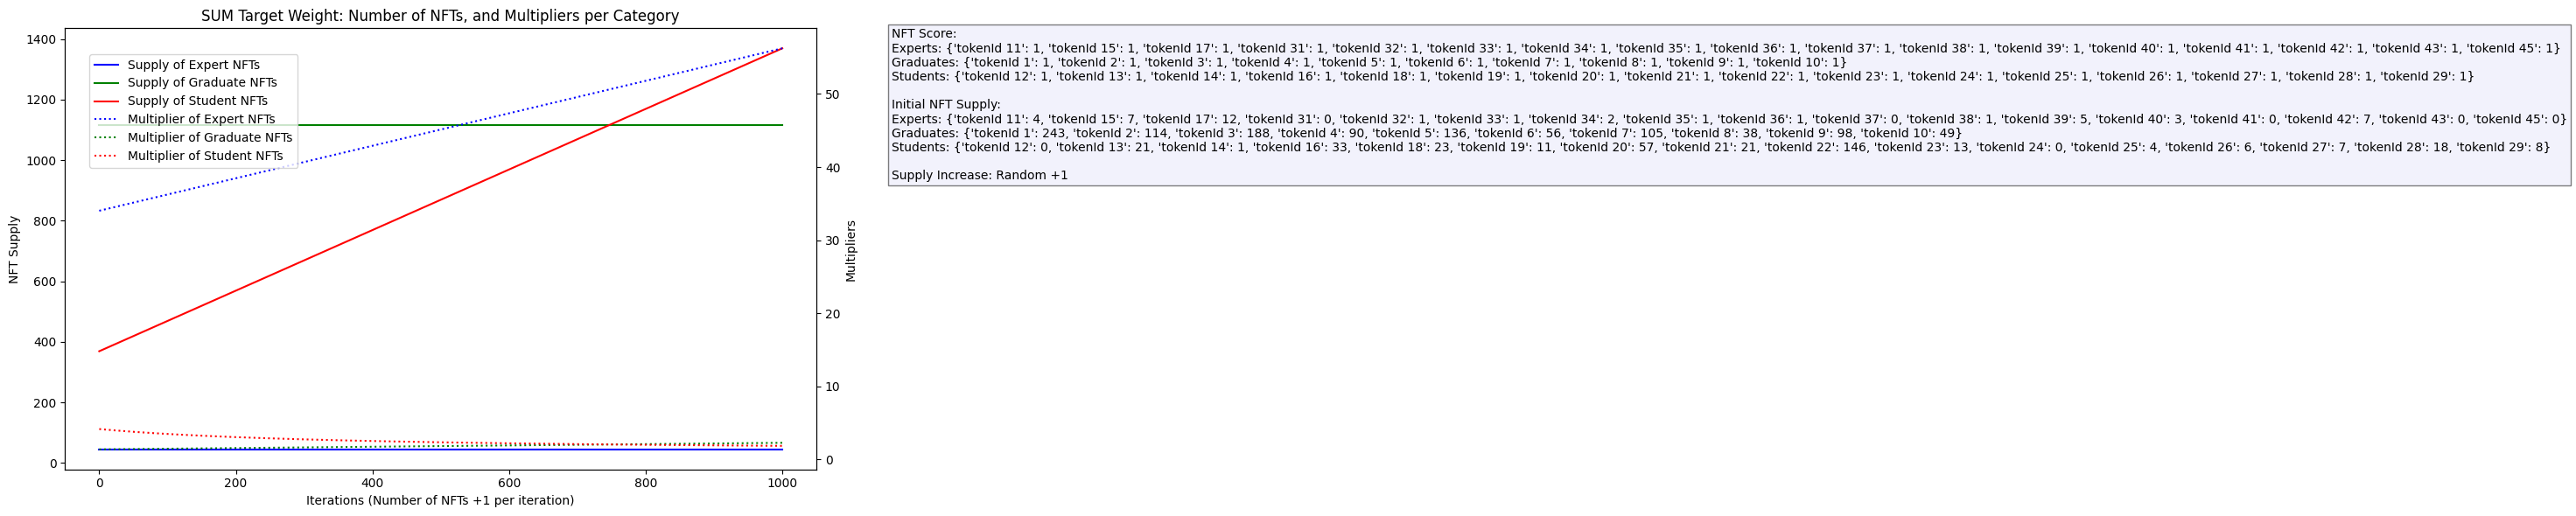

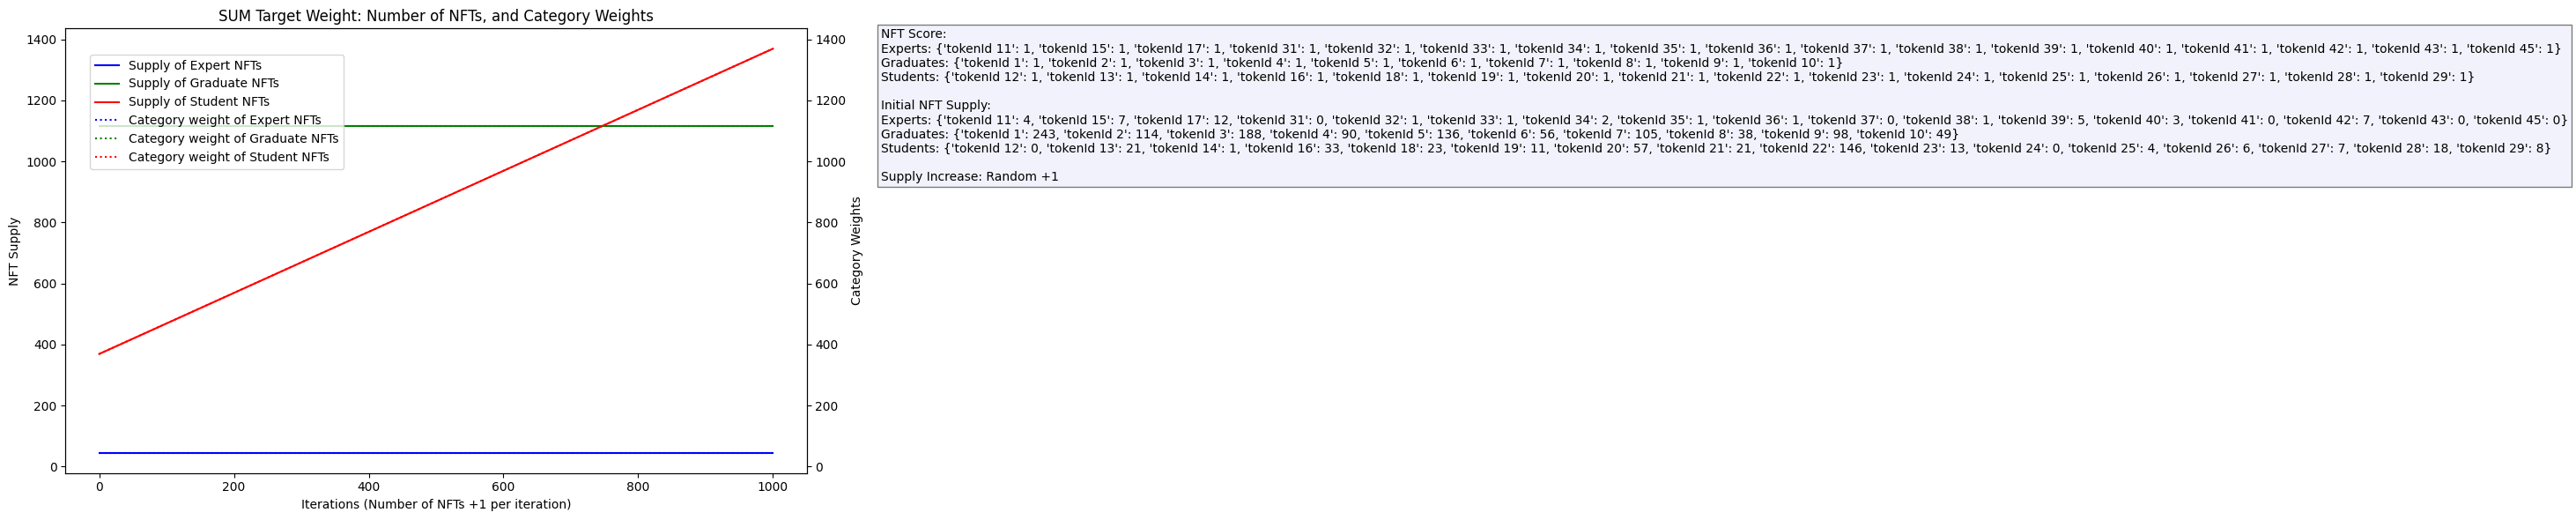

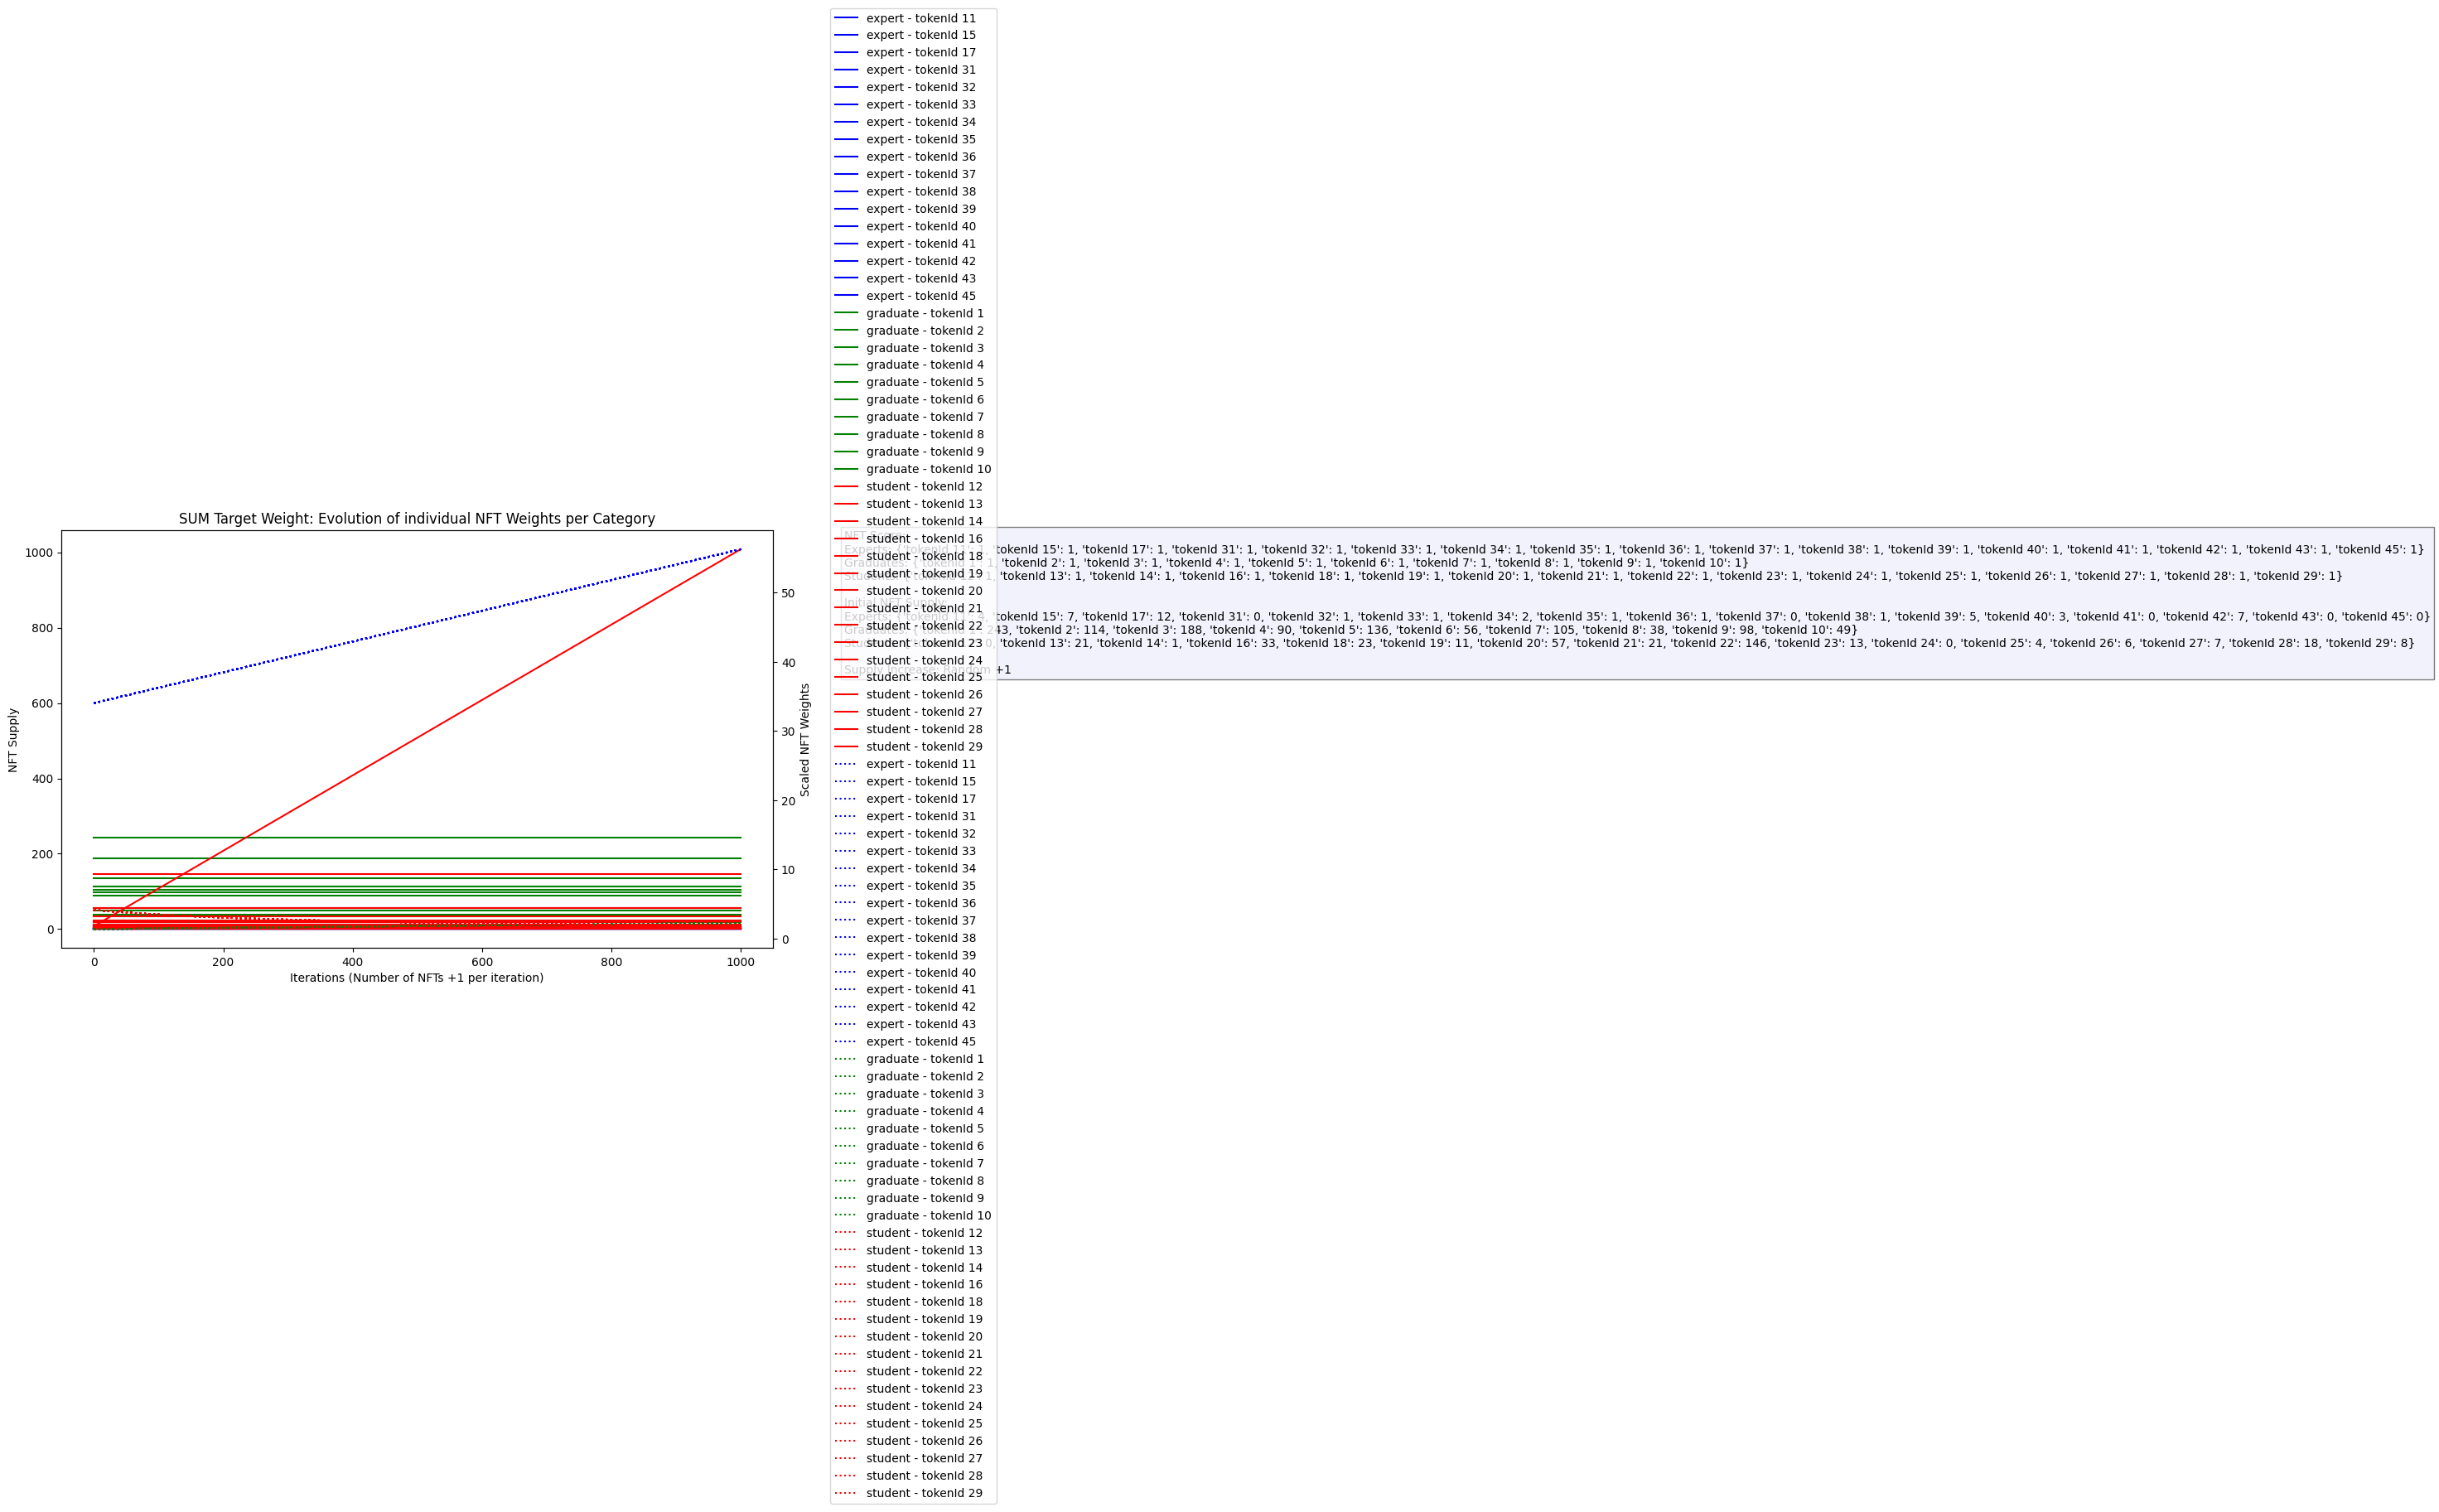

In [ ]:
#############
## RESULTS ##
#############

#print("Multipliers")
#print(multipliers)
#print("Category weights")
#print(category_weights)
#print("New weights")
#print(new_nft_weights)

############
## GRAPHS ##
############

### Text box for graph clarity ###
textbox = '\n'.join([
    'NFT Score:',
    f"Experts: {nft_scores['expert']}",
    f"Graduates: {nft_scores['graduate']}",
    f"Students: {nft_scores['student']}",
    '',
    'Initial NFT Supply:',
    f"Experts: {initial_nft_supply['expert']}",
    f"Graduates: {initial_nft_supply['graduate']}",
    f"Students: {initial_nft_supply['student']}",
    '',
    'Supply Increase: Random +1',
])

### Multipliers ###
# print the multiplier graphs

# Create the total weights plot with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

bbox = dict(boxstyle='square', facecolor='lavender', alpha=0.5)
fig.text(1.1, 1, textbox, fontsize=10, transform=ax1.transAxes, bbox=bbox,
verticalalignment='top')

# Plot target_weight and number of NFTs on the primary y-axis (ax1)
#ax1.plot(range(iterations), target_weights, label='Target Weight', color='black', linestyle='--')
for category in total_amounts:
    ax1.plot(range(iterations), total_amounts[category], label=f'Supply of {category.capitalize()} NFTs', color=colors[category])

# Set labels for the primary y-axis
ax1.set_xlabel('Iterations (Number of NFTs +1 per iteration)')
ax1.set_ylabel('NFT Supply')
ax1.set_title('SUM Target Weight: Number of NFTs, and Multipliers per Category')

# Create the secondary y-axis (ax2) for multipliers
ax2 = ax1.twinx()

# Plot multipliers for each category on the secondary y-axis (ax2)
for category in multipliers:
    ax2.plot(range(iterations), multipliers[category], label=f'Multiplier of {category.capitalize()} NFTs', color=colors[category], linestyle=':')

# Set labels for the secondary y-axis
ax2.set_ylabel('Multipliers')

# Combine legends from both y-axes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.tight_layout()
plt.show()

### Category weights ###
# Print the category weights graphs

# Create the total weights plot with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

bbox = dict(boxstyle='square', facecolor='lavender', alpha=0.5)
fig.text(1.1, 1, textbox, fontsize=10, transform=ax1.transAxes, bbox=bbox,
verticalalignment='top')

# Plot target_weight and number of NFTs on the primary y-axis (ax1)
#ax1.plot(range(iterations), target_weights, label='Target Weight', color='black', linestyle='--')
for category in total_amounts:
    ax1.plot(range(iterations), total_amounts[category], label=f'Supply of {category.capitalize()} NFTs', color=colors[category])

# Set labels for the primary y-axis
ax1.set_xlabel('Iterations (Number of NFTs +1 per iteration)')
ax1.set_ylabel('NFT Supply')
ax1.set_title('SUM Target Weight: Number of NFTs, and Category Weights')

# Create the secondary y-axis (ax2) for multipliers
ax2 = ax1.twinx()

# Plot multipliers for each category on the secondary y-axis (ax2)
for category in category_weights:
    ax2.plot(range(iterations), category_weights[category], label=f'Category weight of {category.capitalize()} NFTs', color=colors[category], linestyle=':')

# Set labels for the secondary y-axis
ax2.set_ylabel('Category Weights')

# Combine legends from both y-axes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.tight_layout()
plt.show()

### Individual NFT weights ###
# Print the weights of all NFTs over time

# Create the individual weights plot
fig, ax1 = plt.subplots(figsize=(10, 6))

bbox = dict(boxstyle='square', facecolor='lavender', alpha=0.5)
fig.text(1.1, 1, textbox, fontsize=10, transform=ax1.transAxes, bbox=bbox,
verticalalignment='top')

# Set labels for the primary y-axis
ax1.set_xlabel('Iterations (Number of NFTs +1 per iteration)')
ax1.set_ylabel('NFT Supply')
ax1.set_title('SUM Target Weight: Evolution of individual NFT Weights per Category')

# Plot target_weight and number of NFTs on the primary y-axis (ax1)
for category in nft_supplies:
    for nft_type in nft_supplies[category]:
        values = nft_supplies[category][nft_type]
        ax1.plot(range(iterations), values, label=f'{category} - {nft_type}', color=colors[category])

# Create the secondary y-axis (ax2) for multipliers
ax2 = ax1.twinx()
ax2.set_ylabel('Scaled NFT Weights')

# Plot individual NFT weights
for category in nft_weights:
    for nft_type in nft_weights[category]:
        values = nft_weights[category][nft_type]
        ax2.plot(range(iterations), values, label=f'{category} - {nft_type}', color=colors[category], linestyle=':')

fig.legend(loc='upper left', bbox_to_anchor=(1, 2, 0.5, 0))

# Show the plot
plt.tight_layout()
plt.show()
